In [598]:
import pandas as pd

## Model Training

In [599]:
df = pd.read_csv('gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [600]:
df=df.drop(labels=['id'],axis=1)

In [601]:
## Independent and dependent features
X = df.drop(labels=['price'],axis=1)
y = df[['price']]

In [602]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [603]:
y

,price
0,13619
1,13387
2,2772
3,666
4,14453
...,...
193568,1130
193569,2874
193570,3036
193571,681


In [604]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [605]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [606]:
print(X_train.shape)

(154858, 9)


In [607]:
print(X_test.shape)

(38715, 9)


In [608]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
126898,0.32,Ideal,E,VS2,62.3,56.0,4.36,4.32,2.71
111866,0.55,Ideal,E,VS2,61.5,57.0,5.25,5.29,3.24
185061,1.03,Very Good,E,SI2,63.1,56.0,6.42,6.39,4.04
85046,1.51,Premium,E,VS1,62.5,59.0,7.34,7.38,4.60
9925,1.15,Ideal,J,VS2,61.3,56.0,6.74,6.78,4.15
...,...,...,...,...,...,...,...,...,...
152315,1.23,Good,G,SI2,63.7,56.0,6.72,6.79,4.31
176963,0.36,Ideal,F,VS2,60.8,57.0,4.64,4.61,2.82
117952,1.73,Premium,I,VS2,62.1,58.0,7.62,7.59,4.74
173685,0.34,Ideal,E,VVS2,60.9,57.0,4.49,4.53,2.74


In [609]:
columns_trans = make_column_transformer((OneHotEncoder(),['cut_categories','color_categories','clarity_categories']),remainder='passthrough')

In [610]:
scaler = StandardScaler(with_mean=False)

In [611]:
lr = LinearRegression()

In [612]:
pipe_lr = make_pipeline(columns_trans,scaler,lr)

In [613]:
pipe_lr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cut_categories',
                                                   'color_categories',
                                                   'clarity_categories'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [614]:
# Segregating numerical and categorical variables
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [615]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
126898,0.32,Ideal,E,VS2,62.3,56.0,4.36,4.32,2.71
111866,0.55,Ideal,E,VS2,61.5,57.0,5.25,5.29,3.24
185061,1.03,Very Good,E,SI2,63.1,56.0,6.42,6.39,4.04
85046,1.51,Premium,E,VS1,62.5,59.0,7.34,7.38,4.60
9925,1.15,Ideal,J,VS2,61.3,56.0,6.74,6.78,4.15
...,...,...,...,...,...,...,...,...,...
152315,1.23,Good,G,SI2,63.7,56.0,6.72,6.79,4.31
176963,0.36,Ideal,F,VS2,60.8,57.0,4.64,4.61,2.82
117952,1.73,Premium,I,VS2,62.1,58.0,7.62,7.59,4.74
173685,0.34,Ideal,E,VVS2,60.9,57.0,4.49,4.53,2.74


In [616]:
# Define the custom ranking for each ordinal variable
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [617]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [618]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
126898,0.32,Ideal,E,VS2,62.3,56.0,4.36,4.32,2.71
111866,0.55,Ideal,E,VS2,61.5,57.0,5.25,5.29,3.24
185061,1.03,Very Good,E,SI2,63.1,56.0,6.42,6.39,4.04
85046,1.51,Premium,E,VS1,62.5,59.0,7.34,7.38,4.60
9925,1.15,Ideal,J,VS2,61.3,56.0,6.74,6.78,4.15


In [619]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])


In [620]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
126898,0.32,Ideal,E,VS2,62.3,56.0,4.36,4.32,2.71
111866,0.55,Ideal,E,VS2,61.5,57.0,5.25,5.29,3.24
185061,1.03,Very Good,E,SI2,63.1,56.0,6.42,6.39,4.04
85046,1.51,Premium,E,VS1,62.5,59.0,7.34,7.38,4.60
9925,1.15,Ideal,J,VS2,61.3,56.0,6.74,6.78,4.15
...,...,...,...,...,...,...,...,...,...
152315,1.23,Good,G,SI2,63.7,56.0,6.72,6.79,4.31
176963,0.36,Ideal,F,VS2,60.8,57.0,4.64,4.61,2.82
117952,1.73,Premium,I,VS2,62.1,58.0,7.62,7.59,4.74
173685,0.34,Ideal,E,VVS2,60.9,57.0,4.49,4.53,2.74


In [621]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [622]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
168192,0.34,Ideal,I,VVS2,60.9,57.0,4.56,4.53,2.76
35202,0.90,Good,E,SI1,63.8,57.0,6.07,6.03,3.87
41091,1.02,Premium,G,VS1,62.7,58.0,6.35,6.39,4.00
31239,0.32,Premium,G,VS2,62.1,59.0,4.37,4.35,2.71
45722,0.35,Ideal,J,VVS2,61.1,56.0,4.53,4.57,2.78
...,...,...,...,...,...,...,...,...,...
66455,0.31,Ideal,E,SI1,61.8,56.0,4.31,4.35,2.68
46220,1.25,Ideal,G,SI2,62.0,56.0,6.88,6.95,4.28
98804,1.00,Good,G,SI1,63.5,56.0,6.29,6.37,4.02
48045,1.10,Ideal,G,VS1,59.9,60.0,6.68,6.77,4.01


In [623]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [624]:
X_train.head()

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.975439,-0.849607,-0.121531,-1.042757,-1.080970,-1.123150,0.874076,1.528722,1.352731
1,0.235195,1.833637,-0.121531,0.318447,0.279859,0.485354,-2.144558,-0.935071,-0.646786
2,0.494617,0.815855,0.399800,0.570855,0.606458,0.673737,-0.132136,0.296826,0.686225
3,-1.018676,0.260701,0.921131,-1.214034,-1.244270,-1.195605,-0.132136,0.296826,0.019720
4,-0.953821,-0.664555,-0.642862,-1.069801,-1.044681,-1.094168,0.874076,2.144670,1.352731


In [625]:
## Model Training

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [626]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [627]:
regression.coef_

array([[ 6433.66003594,  -132.75843566,   -70.42922179, -1720.30971463,
         -499.29302619,   -63.39317848,    72.44537247,  -460.41604642,
          650.76431652]])

In [628]:
regression.intercept_

array([3970.76628955])

In [661]:
pipe_regression = make_pipeline(columns_trans,scaler,regression)

In [629]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square


In [630]:
from sklearn.tree import DecisionTreeRegressor

In [631]:
## Train multiple models
## Model Ecaluation
models={
    'decisionTree': DecisionTreeRegressor(),
    'LinearRegression':LinearRegression(),
    'Elasticnet':ElasticNet(),
    'Ridge':Ridge(),
    'Lasso':Lasso()
    
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')


decisionTree
Model Training Performance
RMSE: 837.9267508091455
MAE: 422.8869219819075
R2 score 95.68967185482722


LinearRegression
Model Training Performance
RMSE: 1013.9047094344028
MAE: 674.0255115796638
R2 score 93.68908248567507


Elasticnet
Model Training Performance
RMSE: 1533.4162456064066
MAE: 1060.7368759154735
R2 score 85.56494831165178


Ridge
Model Training Performance
RMSE: 1013.905927277139
MAE: 674.0555800797692
R2 score 93.6890673250597


Lasso
Model Training Performance
RMSE: 1013.8784226767011
MAE: 675.0716923362094
R2 score 93.68940971841704




In [632]:
lasso = Lasso()

In [633]:
model_lasso = model.fit(X_train,y_train)

In [634]:
model_lasso

Lasso()

In [635]:
y_pred_ridge = model_lasso.predict(X_test)

In [636]:
y_pred_ridge

array([ 1931.45676591,  1892.02436425,  1471.92136843, ...,
        1862.58873952,   165.6059995 , 14921.30428605])

In [637]:
r2_score(y_test,y_pred_ridge)

0.9368940971841704

In [638]:
import pickle

In [639]:
pickle.dump(model_lasso,open('LassoModelDiamond.pkl','wb'))

In [640]:
from sklearn.tree import DecisionTreeRegressor

In [641]:
model_decision = DecisionTreeRegressor()

In [642]:
pipe_decision_tree = make_pipeline(columns_trans,scaler,model_decision)

In [643]:
model_decision

DecisionTreeRegressor()

In [644]:
model_decision.fit(X_train,y_train)

DecisionTreeRegressor()

In [645]:
y_pred_decision_tree = model_decision.predict(X_test)

In [646]:
y_pred_decision_tree

array([ 1760.,  2181.,   814., ...,  1975.,   770., 14892.])

In [647]:
r2_score(y_test,y_pred_decision_tree)

0.9573258755439996

In [648]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [649]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


/var/folders/88/wb91xyx52873d36958kg6w6h0000gn/T/ipykernel_46864/1918726914.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carat'])


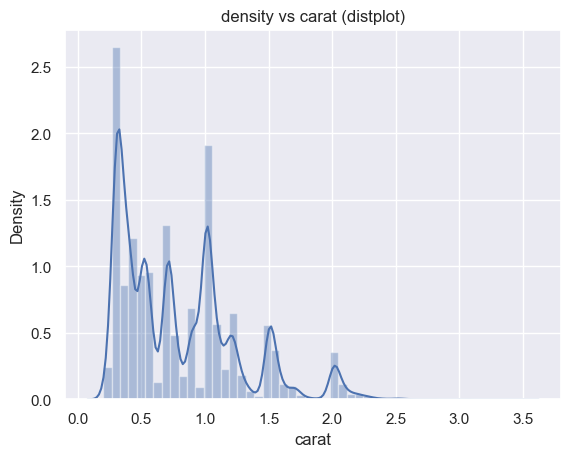

In [650]:
sns.distplot(df['carat'])
plt.title('density vs carat (distplot)')
plt.show()

/var/folders/88/wb91xyx52873d36958kg6w6h0000gn/T/ipykernel_46864/1741237882.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['depth'])


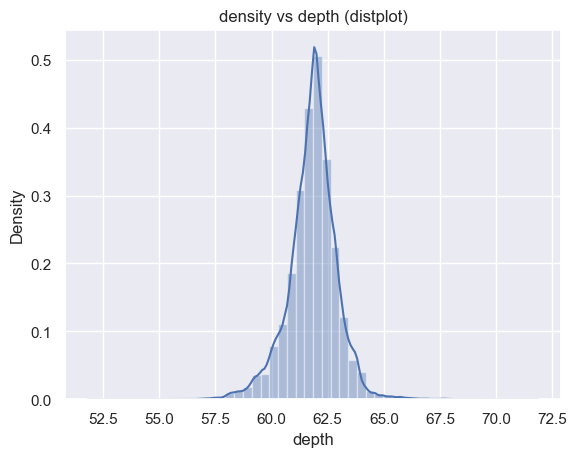

In [651]:
sns.distplot(df['depth'])
plt.title('density vs depth (distplot)')
plt.show()


/var/folders/88/wb91xyx52873d36958kg6w6h0000gn/T/ipykernel_46864/836010313.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['table'])


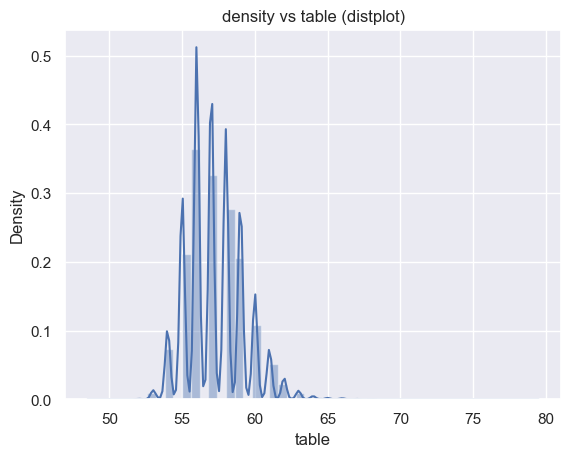

In [652]:
sns.distplot(df['table'])
plt.title('density vs table (distplot)')
plt.show()

/var/folders/88/wb91xyx52873d36958kg6w6h0000gn/T/ipykernel_46864/2146632731.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['x'])


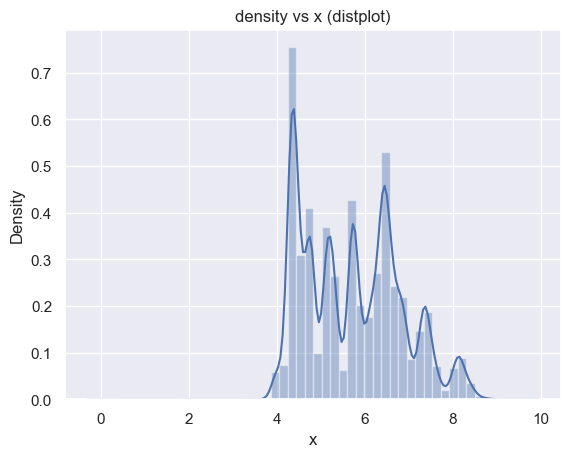

In [653]:
sns.distplot(df['x'])
plt.title('density vs x (distplot)')
plt.show()

/var/folders/88/wb91xyx52873d36958kg6w6h0000gn/T/ipykernel_46864/78564371.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['y'])


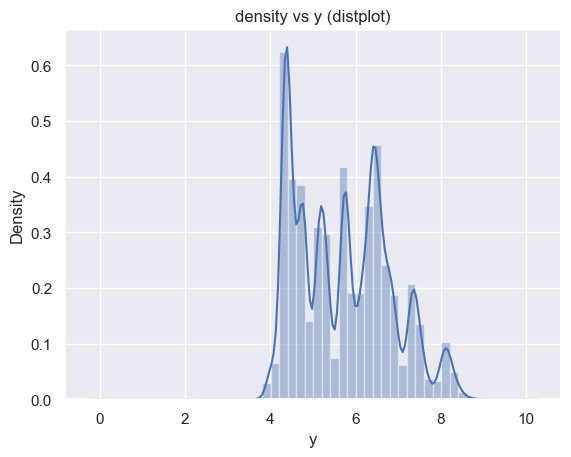

In [654]:
sns.distplot(df['y'])
plt.title('density vs y (distplot)')
plt.show()

/var/folders/88/wb91xyx52873d36958kg6w6h0000gn/T/ipykernel_46864/869609248.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['z'])


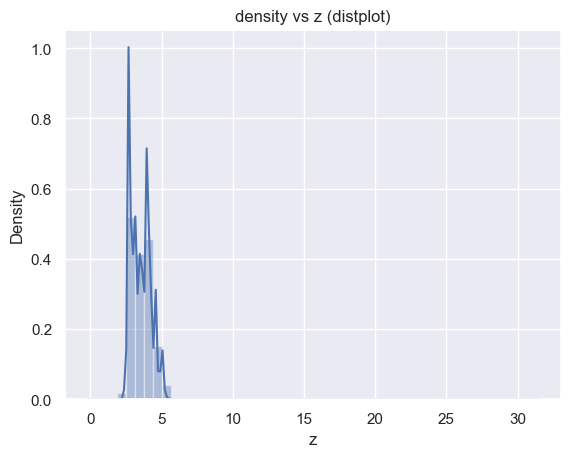

In [655]:
sns.distplot(df['z'])
plt.title('density vs z (distplot)')
plt.show()


/var/folders/88/wb91xyx52873d36958kg6w6h0000gn/T/ipykernel_46864/3035507858.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


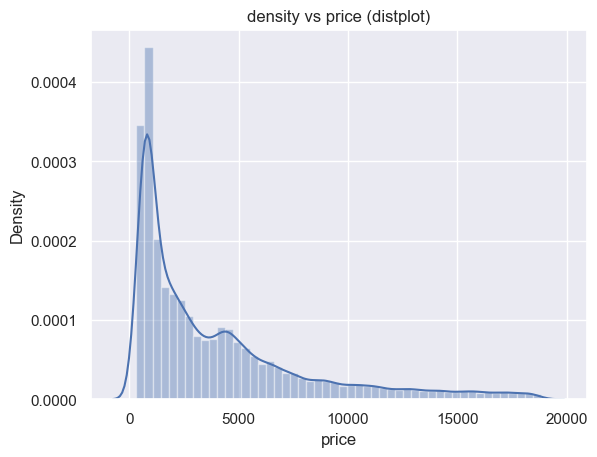

In [656]:
sns.distplot(df['price'])
plt.title('density vs price (distplot)')
plt.show()

/var/folders/88/wb91xyx52873d36958kg6w6h0000gn/T/ipykernel_46864/943581646.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carat'])


<Axes: xlabel='carat', ylabel='Density'>

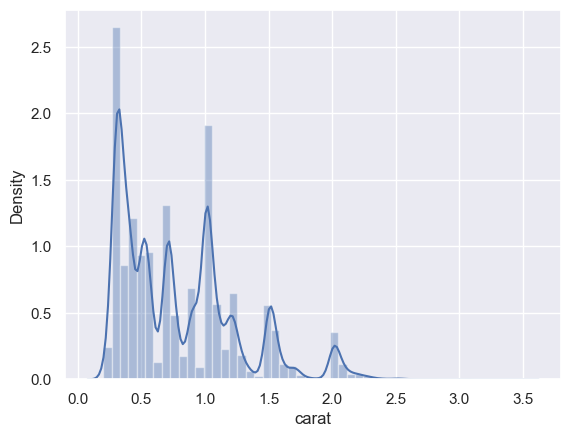

In [657]:
sns.distplot(df['carat'])

In [658]:
import matplotlib.pyplot as plt

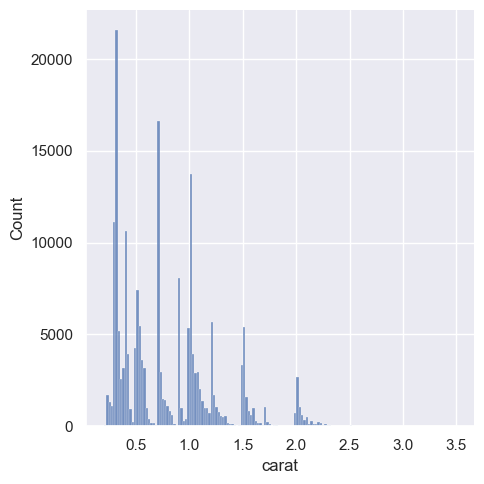

In [659]:
sns.displot(df['carat'])
##displot = histogram

KeyboardInterrupt: 

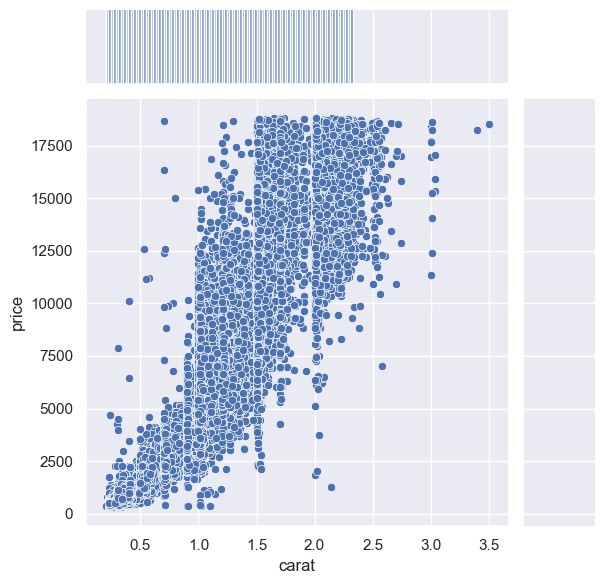

In [660]:
sns.jointplot(x = 'carat' , y = 'price',data = df)
plt.title('price vs carat (jointplot)')
plt.show()

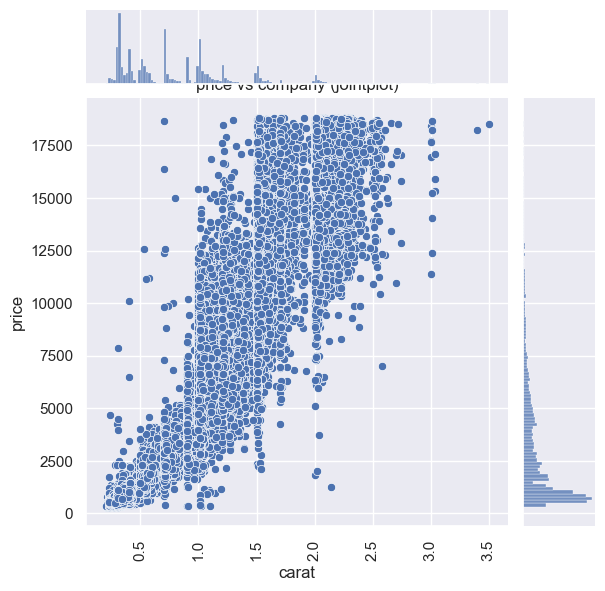

In [ ]:
sns.jointplot(x = 'carat', y='price' , data=df)
plt.xticks(rotation=90)
plt.title('price vs company (jointplot)')
plt.show()

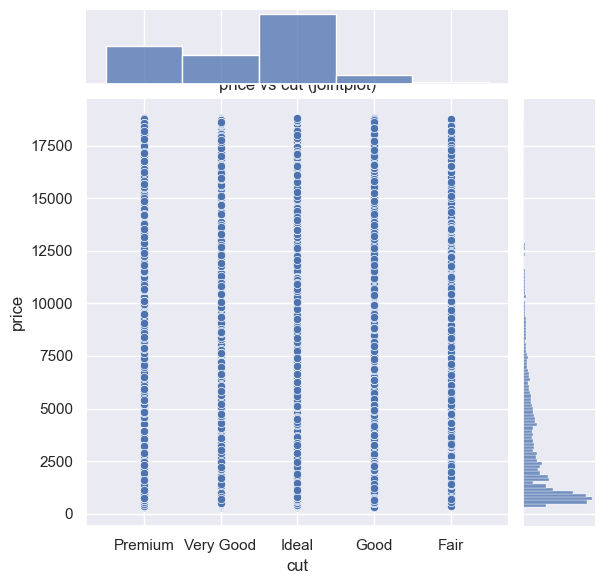

In [ ]:
sns.jointplot(x = 'cut', y='price' , data=df)
plt.title('price vs cut (jointplot)')
plt.show()

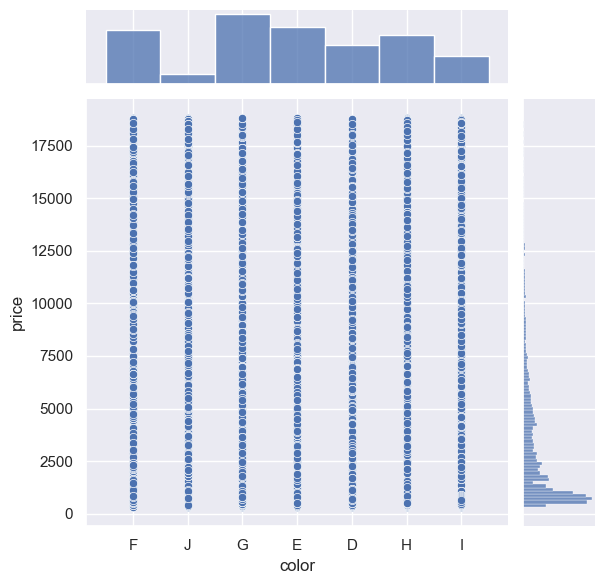

In [ ]:
sns.jointplot(x = 'color', y='price' , data=df)

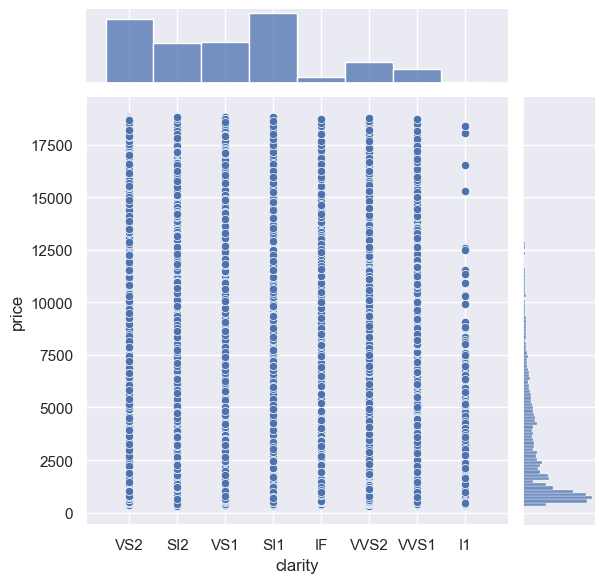

In [ ]:
sns.jointplot(x = 'clarity', y='price' , data=df)


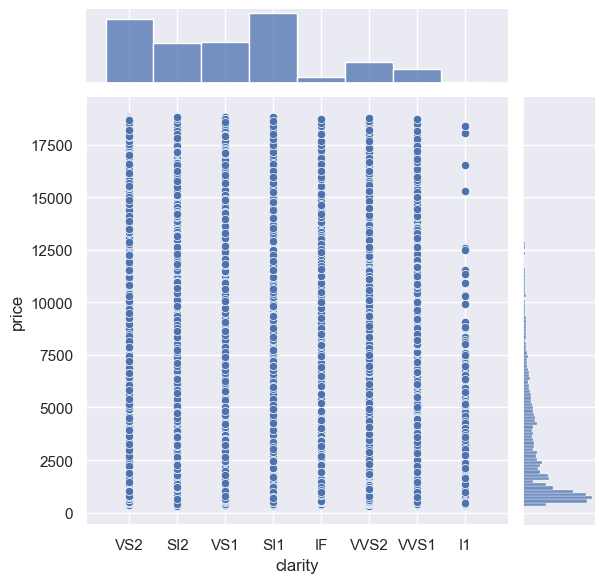

In [ ]:
sns.jointplot(x = 'clarity', y='price' , data=df)

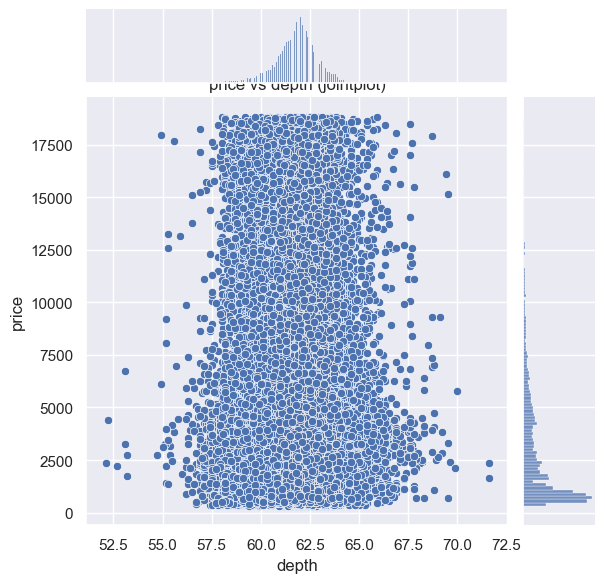

In [ ]:
sns.jointplot(x = 'depth', y='price' , data=df)
plt.title('price vs depth (jointplot)')
plt.show()

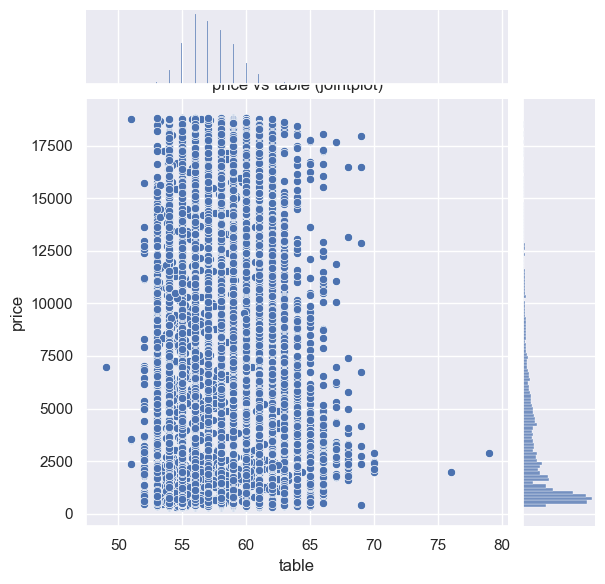

In [ ]:
sns.jointplot(x = 'table', y='price' , data=df)
plt.title('price vs table (jointplot)')
plt.show()

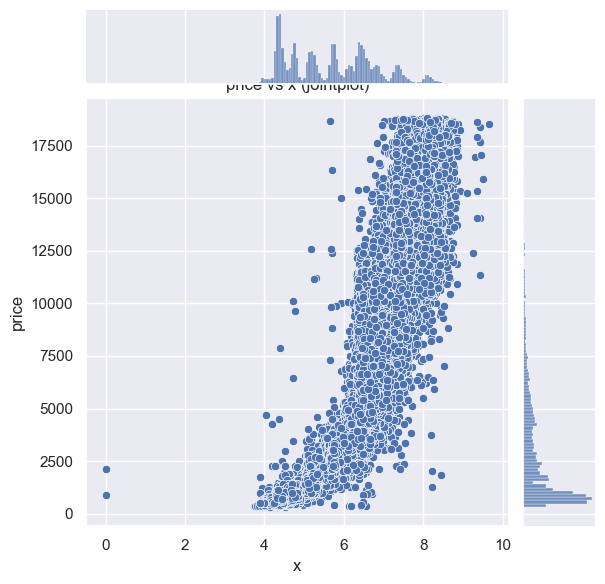

In [ ]:
sns.jointplot(x = 'x', y='price' , data=df)
plt.title('price vs x (jointplot)')
plt.show()

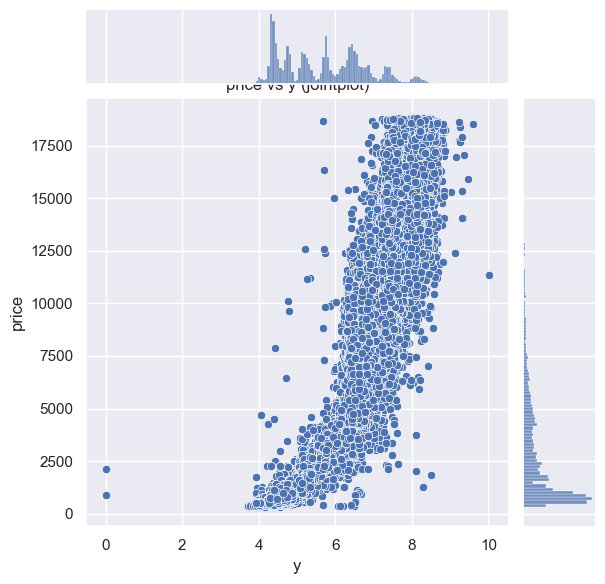

In [ ]:
sns.jointplot(x = 'y', y='price' , data=df)
plt.title('price vs y (jointplot)')
plt.show()

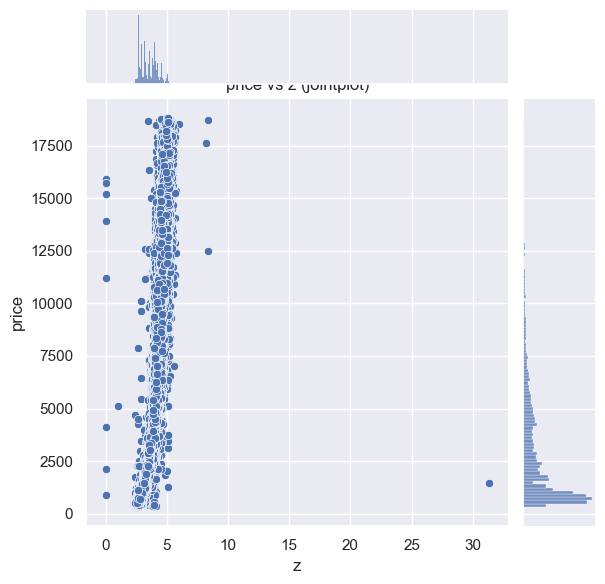

In [ ]:
sns.jointplot(x = 'z', y='price' , data=df)
plt.title('price vs z (jointplot)')
plt.show()

KeyboardInterrupt: 

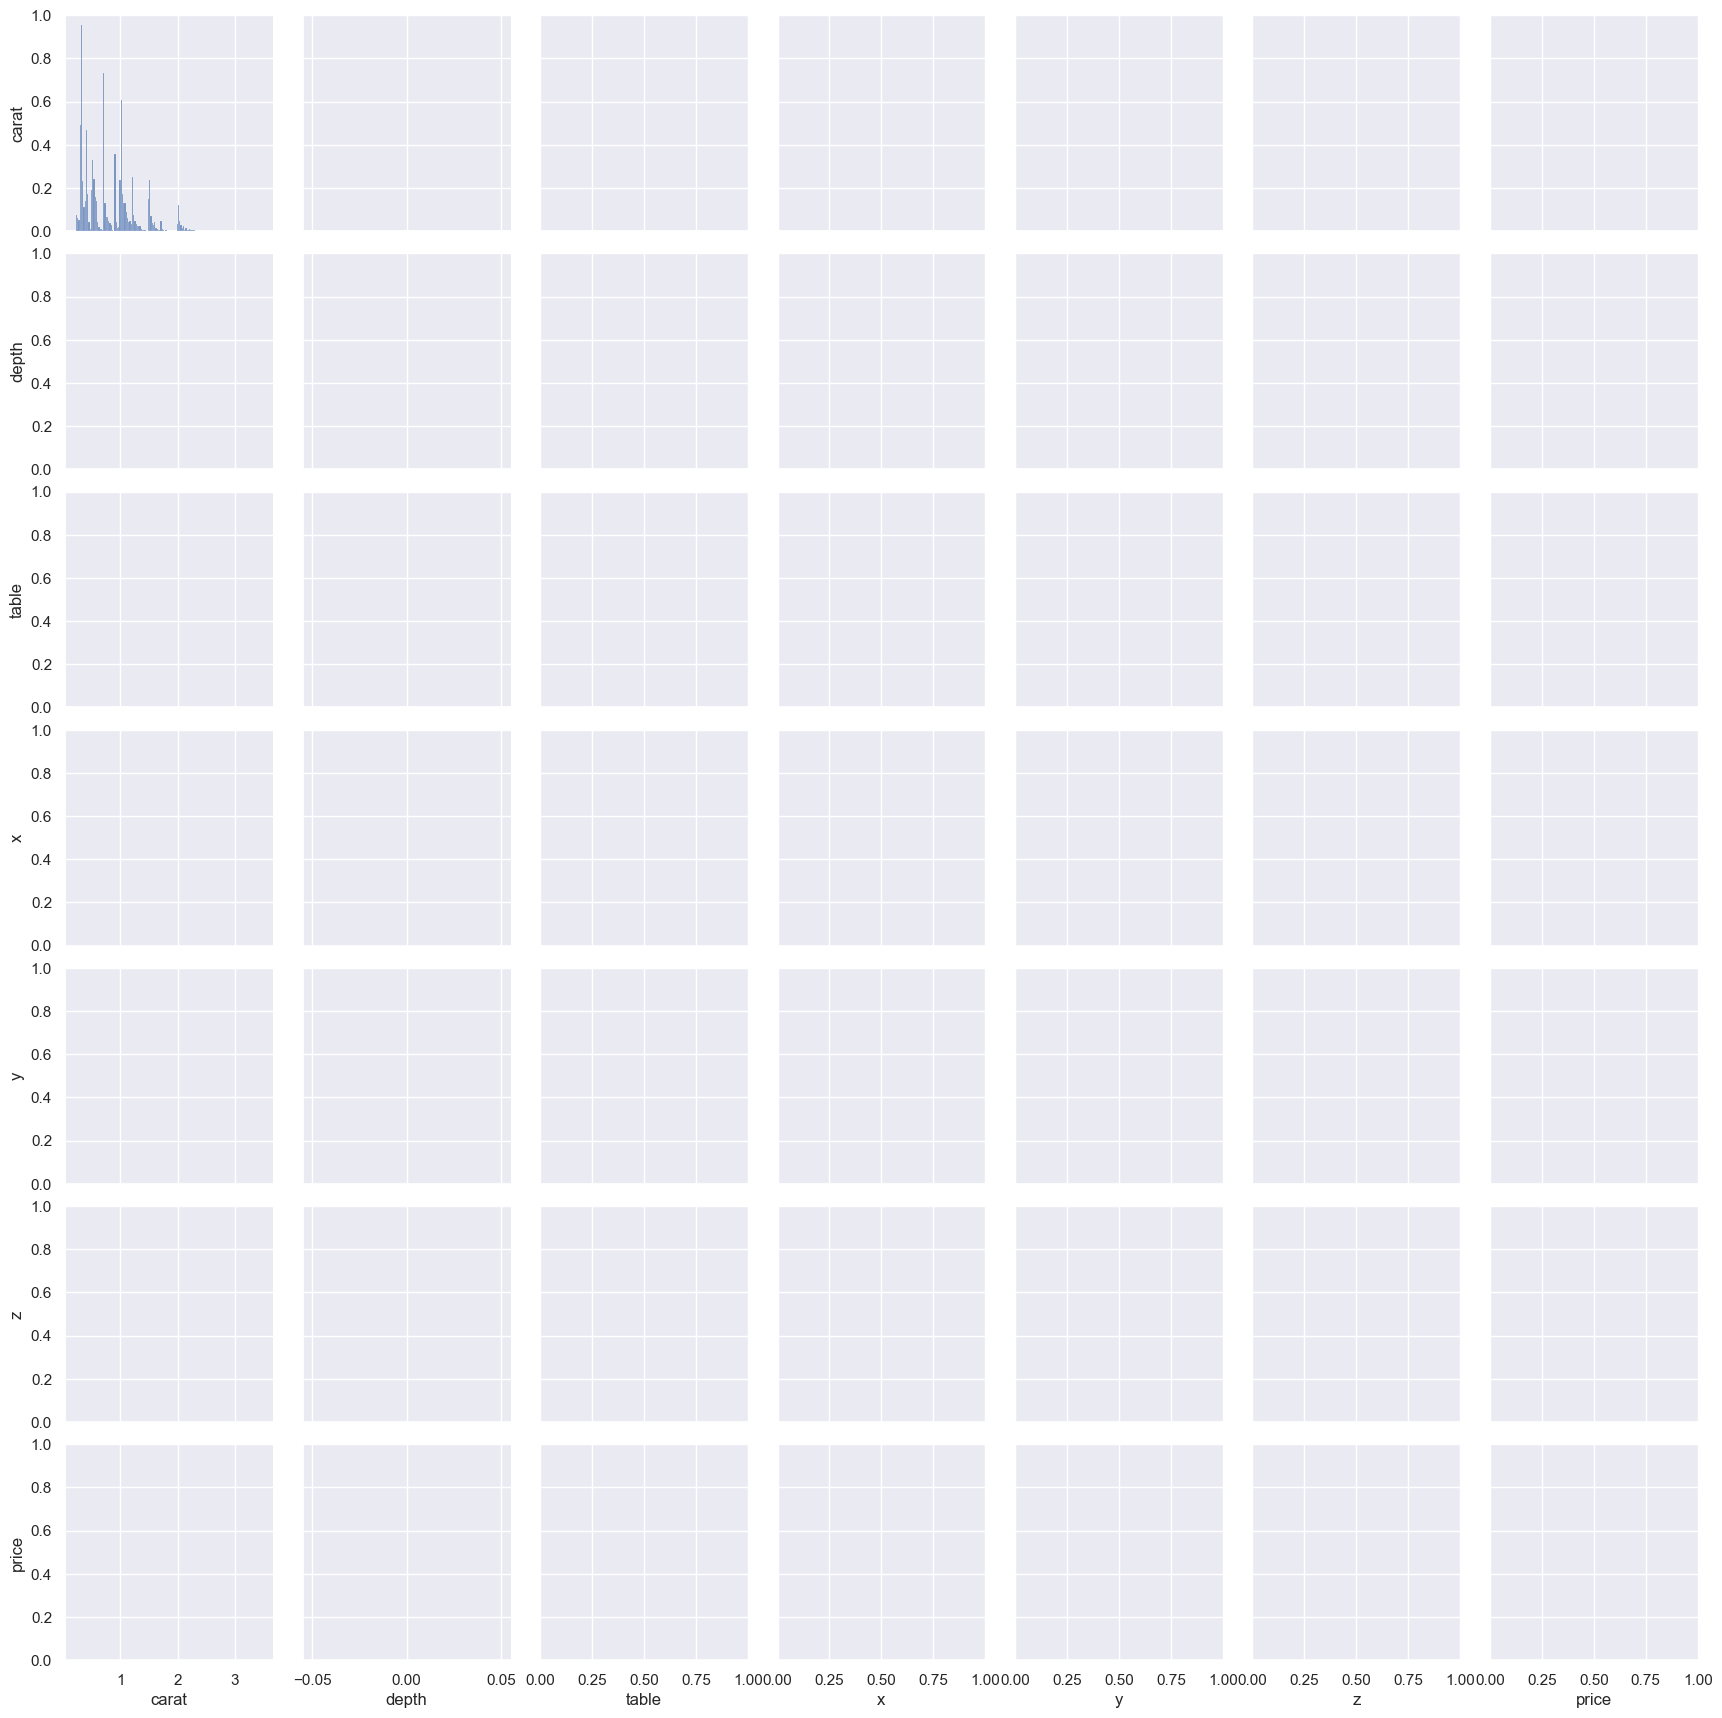

In [ ]:
sns.pairplot(df)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
model_kneighbour = KNeighborsRegressor(n_neighbors=5)

In [ ]:
model_kneighbour

KNeighborsRegressor()

In [ ]:
## Train multiple models
## Model Ecaluation
models={
    'Kneighbour': KNeighborsRegressor(n_neighbors=5),
    'Randomforest':RandomForestRegressor(n_estimators=100, random_state=42),
    
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')


Kneighbour
Model Training Performance
RMSE: 668.5568647202068
MAE: 350.78431257748997
R2 score 97.25605799373203




/Users/prabhatarora/Desktop/mydiamondproject/.venv/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Randomforest
Model Training Performance
RMSE: 609.9633110944794
MAE: 311.53080855538934
R2 score 97.71594977390824




In [ ]:
# ## Train multiple models
# ## Model Ecaluation
# models={
#     'svr':SVR(kernel='rbf')
    
# }
# trained_model_list=[]
# model_list=[]
# r2_list=[]

# for i in range(len(list(models))):
#     model=list(models.values())[i]
#     model.fit(X_train,y_train)

#     #Make Predictions
#     y_pred=model.predict(X_test)

#     mae, rmse, r2_square=evaluate_model(y_test,y_pred)

#     print(list(models.keys())[i])
#     model_list.append(list(models.keys())[i])

#     print('Model Training Performance')
#     print("RMSE:",rmse)
#     print("MAE:",mae)
#     print("R2 score",r2_square*100)

#     r2_list.append(r2_square)
    
#     print('='*35)
#     print('\n')


In [ ]:

ohe = OneHotEncoder()

In [ ]:
column_trans=make_column_transformer((OneHotEncoder(),['cat_pipeline__cut','cat_pipeline__color','cat_pipeline__clarity']),
                                    remainder='passthrough')
pipe_kneighbour = make_pipeline(column_trans,model_kneighbour)
scaler = StandardScaler(with_mean=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
KNeighborsRegressor = KNeighborsRegressor()

In [ ]:
pipe_KNeighborsRegressor = make_pipeline(column_trans,scaler,KNeighborsRegressor)

In [ ]:
pipe_KNeighborsRegressor

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cat_pipeline__cut',
                                                   'cat_pipeline__color',
                                                   'cat_pipeline__clarity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('kneighborsregressor', KNeighborsRegressor())])

In [ ]:
pipe_KNeighborsRegressor.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cat_pipeline__cut',
                                                   'cat_pipeline__color',
                                                   'cat_pipeline__clarity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('kneighborsregressor', KNeighborsRegressor())])

In [ ]:
y_pred_KNeighborsRegressor = pipe_KNeighborsRegressor.predict(X_test)

In [ ]:
y_pred_KNeighborsRegressor

array([[ 1762.6],
       [ 2280. ],
       [  779. ],
       ...,
       [ 1645.8],
       [  842. ],
       [13607.8]])

In [ ]:
print(r2_score(y_test,y_pred_KNeighborsRegressor))
print(mean_absolute_error(y_test,y_pred_KNeighborsRegressor))
print(mean_squared_error(y_test,y_pred_KNeighborsRegressor))

0.9683001397181188
367.5237016117923
516367.7671511227


In [ ]:
randomforestregressor=RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
pipe_randomforestregressor = make_pipeline(column_trans,scaler,randomforestregressor)

In [ ]:
pipe_randomforestregressor.fit(X_train,y_train)

/Users/prabhatarora/Desktop/mydiamondproject/.venv/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cat_pipeline__cut',
                                                   'cat_pipeline__color',
                                                   'cat_pipeline__clarity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
y_pred_randomforestregressor = pipe_randomforestregressor.predict(X_test)

In [ ]:
y_pred_randomforestregressor

array([ 1713.87,  2253.92,   794.01, ...,  1956.76,   873.17, 13949.18])

In [ ]:
print(r2_score(y_test,y_pred_randomforestregressor))
print(mean_absolute_error(y_test,y_pred_randomforestregressor))
print(mean_squared_error(y_test,y_pred_randomforestregressor))

0.9770369879899039
311.7768348944769
374050.83597466326


In [ ]:
model_svr=SVR(kernel='rbf')

In [ ]:
pipe_model_svr = make_pipeline(column_trans,scaler,model_svr)

In [ ]:
pipe_model_svr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cat_pipeline__cut',
                                                   'cat_pipeline__color',
                                                   'cat_pipeline__clarity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('svr', SVR())])

In [ ]:
# pipe_model_svr.fit(X_train,y_train)

In [ ]:
# y_pred_model_svr = pipe_model_svr.predict(X_test)

In [ ]:
# print(r2_score(y_test,y_pred_model_svr))
# # print(mean_absolute_error(y_test,y_pred_model_svr))
# print(mean_squared_error(y_test,y_pred_model_svr))

In [ ]:
#applying ada boost regressor
from sklearn.ensemble import AdaBoostRegressor
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=100, random_state=42)
ada_boost

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=100, random_state=42)

In [ ]:
pipe_ada_boost = make_pipeline(column_trans,scaler,ada_boost)

In [ ]:
pipe_ada_boost.fit(X_train,y_train)

/Users/prabhatarora/Desktop/mydiamondproject/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cat_pipeline__cut',
                                                   'cat_pipeline__color',
                                                   'cat_pipeline__clarity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('adaboostregressor',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                                   n_estimators=100, random_state=42))])

In [ ]:
y_pred_ada_boost = pipe_ada_boost.predict(X_test)

In [ ]:
y_pred_ada_boost

array([ 3863.69365079,  4238.15724591,  2602.38095238, ...,
        3118.08799099,  4385.5939354 , 14073.06876994])

In [ ]:
print(r2_score(y_test,y_pred_ada_boost))
print(mean_absolute_error(y_test,y_pred_ada_boost))
print(mean_squared_error(y_test,y_pred_ada_boost))

0.6746736625287266
2071.7699894504367
5299330.438106419


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_regressor

GradientBoostingRegressor(random_state=42)

In [ ]:
pipe_gbr_regressor = make_pipeline(column_trans,scaler,gbr_regressor)

In [ ]:
pipe_gbr_regressor.fit(X_train,y_train)

/Users/prabhatarora/Desktop/mydiamondproject/.venv/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cat_pipeline__cut',
                                                   'cat_pipeline__color',
                                                   'cat_pipeline__clarity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])

In [ ]:
y_pred_gbr_regressor = pipe_gbr_regressor.predict(X_test)

In [ ]:
y_pred_gbr_regressor

array([ 1770.20322506,  2167.52431836,   700.38938589, ...,
        2024.85014596,   806.80108043, 13661.45755742])

In [ ]:
print(r2_score(y_test,y_pred_gbr_regressor))
print(mean_absolute_error(y_test,y_pred_gbr_regressor))
print(mean_squared_error(y_test,y_pred_gbr_regressor))

0.971341693186782
374.4079345463427
466823.06382061326


In [ ]:
##applying bagging regressor
from sklearn.ensemble import BaggingRegressor
base_model = DecisionTreeRegressor(max_depth=5)
bagging_regressor = BaggingRegressor()
bagging_regressor.estimators_ = [base_model]

In [ ]:
bagging_regressor

BaggingRegressor()

In [ ]:
pipe_bagging_regressor = make_pipeline(column_trans,scaler,bagging_regressor)

In [ ]:
pipe_bagging_regressor

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cat_pipeline__cut',
                                                   'cat_pipeline__color',
                                                   'cat_pipeline__clarity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('baggingregressor', BaggingRegressor())])

In [ ]:
pipe_bagging_regressor.fit(X_train,y_train)

/Users/prabhatarora/Desktop/mydiamondproject/.venv/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cat_pipeline__cut',
                                                   'cat_pipeline__color',
                                                   'cat_pipeline__clarity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('baggingregressor', BaggingRegressor())])

In [ ]:
y_pred_bagging_regressor = pipe_bagging_regressor.predict(X_test)

In [ ]:
y_pred_bagging_regressor

array([ 1743. ,  2265.8,   769. , ...,  1956.2,   857. , 14140.6])

In [ ]:
print(r2_score(y_test,y_pred_bagging_regressor))
print(mean_absolute_error(y_test,y_pred_bagging_regressor))
print(mean_squared_error(y_test,y_pred_bagging_regressor))

0.9753339814481726
325.30425102623013
401791.579232771


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
ExtraTreesRegressor = ExtraTreesRegressor()
pipe_ExtraTreesRegressor = make_pipeline(column_trans,scaler,ExtraTreesRegressor)

pipe_ExtraTreesRegressor


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cat_pipeline__cut',
                                                   'cat_pipeline__color',
                                                   'cat_pipeline__clarity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('extratreesregressor', ExtraTreesRegressor())])

In [ ]:
pipe_ExtraTreesRegressor.fit(X_train,y_train)

/Users/prabhatarora/Desktop/mydiamondproject/.venv/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cat_pipeline__cut',
                                                   'cat_pipeline__color',
                                                   'cat_pipeline__clarity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('extratreesregressor', ExtraTreesRegressor())])

In [ ]:
y_pred_ExtraTreesRegressor = pipe_ExtraTreesRegressor.predict(X_test)

In [ ]:
y_pred_ExtraTreesRegressor

array([ 1665.02,  2277.92,   788.  , ...,  1887.07,   891.84, 14132.09])

In [ ]:
print(r2_score(y_test,y_pred_ExtraTreesRegressor))
print(mean_absolute_error(y_test,y_pred_ExtraTreesRegressor))
print(mean_squared_error(y_test,y_pred_ExtraTreesRegressor))

0.9759742519375504
319.73704998392805
391362.0366406945


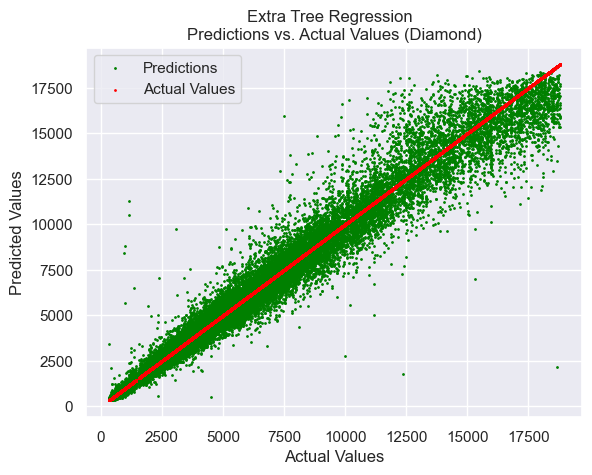

In [ ]:
plt.scatter(y_test, y_pred_ExtraTreesRegressor, color='green', label='Predictions',s=1)
plt.scatter(y_test, y_test, color='red', label='Actual Values',s=1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Extra Tree Regression  \nPredictions vs. Actual Values (Diamond)')
plt.legend()
plt.show()

In [ ]:
# plt.scatter(y_test, y_pred_model_svr, color='green', label='Predictions',s=1)
# plt.scatter(y_test, y_test, color='red', label='Actual Values',s=1)
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Support Vector Regression (SVR Model)  \nPredictions vs. Actual Values (Diamond)')
# plt.legend()
# plt.show()

NameError: name 'y_pred_model_svr' is not defined

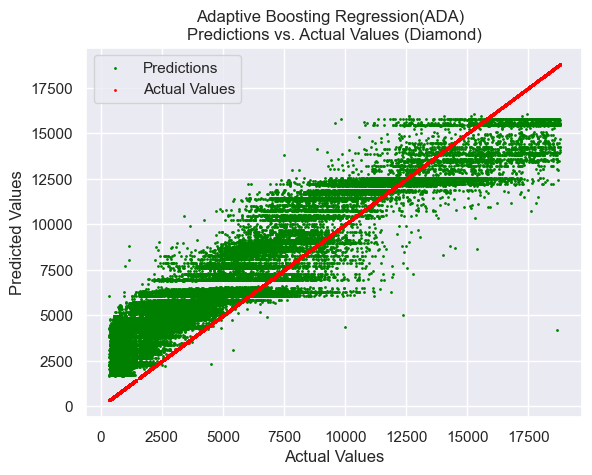

In [ ]:
plt.scatter(y_test, y_pred_ada_boost, color='green', label='Predictions',s=1)
plt.scatter(y_test, y_test, color='red', label='Actual Values',s=1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Adaptive Boosting Regression(ADA)  \nPredictions vs. Actual Values (Diamond)')
plt.legend()
plt.show()

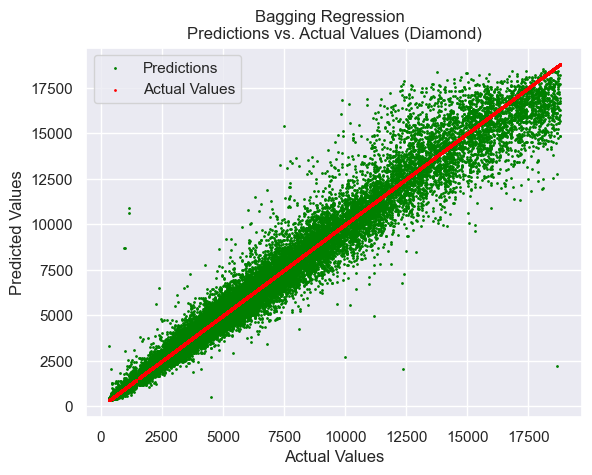

In [ ]:
plt.scatter(y_test, y_pred_bagging_regressor, color='green', label='Predictions',s=1)
plt.scatter(y_test, y_test, color='red', label='Actual Values',s=1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Bagging Regression  \nPredictions vs. Actual Values (Diamond)')
plt.legend()
plt.show()

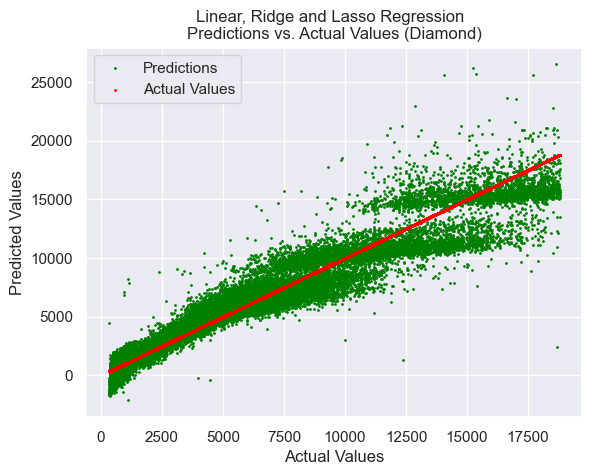

In [ ]:
plt.scatter(y_test, y_pred_ridge, color='green', label='Predictions',s=1)
plt.scatter(y_test, y_test, color='red', label='Actual Values',s=1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear, Ridge and Lasso Regression  \nPredictions vs. Actual Values (Diamond)')
plt.legend()
plt.show()

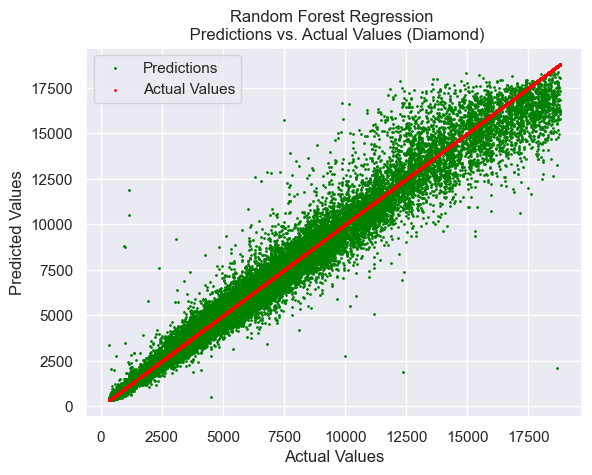

In [ ]:
plt.scatter(y_test, y_pred_randomforestregressor, color='green', label='Predictions',s=1)
plt.scatter(y_test, y_test, color='red', label='Actual Values',s=1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression \n Predictions vs. Actual Values (Diamond)')
plt.legend()
plt.show()

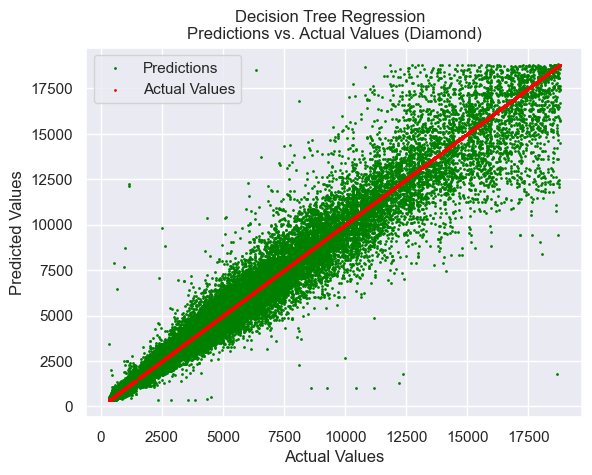

In [ ]:
plt.scatter(y_test, y_pred_decision_tree, color='green', label='Predictions',s=1)
plt.scatter(y_test, y_test, color='red', label='Actual Values',s=1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression  \nPredictions vs. Actual Values (Diamond)')
plt.legend()
plt.show()

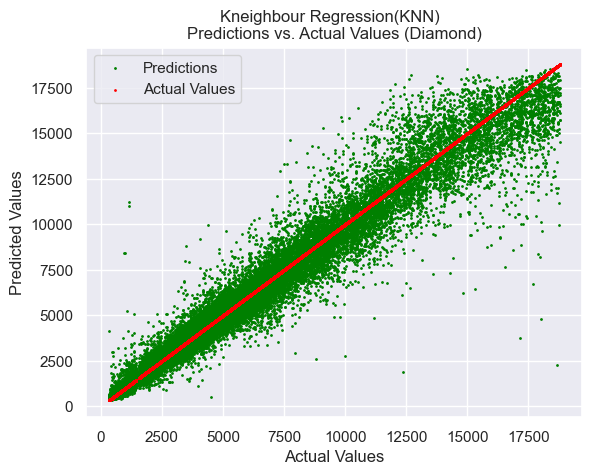

In [ ]:
plt.scatter(y_test, y_pred_KNeighborsRegressor, color='green', label='Predictions',s=1)
plt.scatter(y_test, y_test, color='red', label='Actual Values',s=1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Kneighbour Regression(KNN)  \nPredictions vs. Actual Values (Diamond)')
plt.legend()
plt.show()

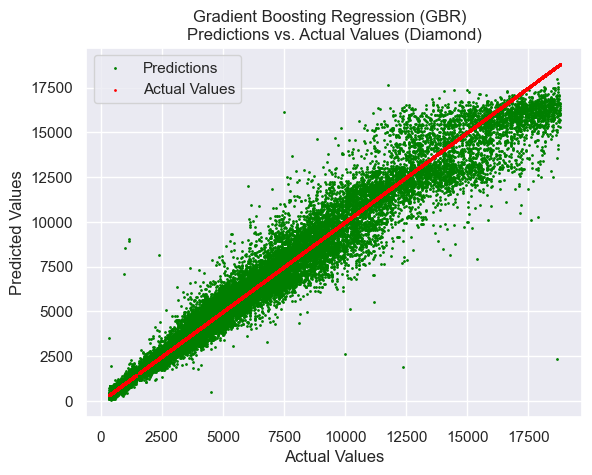

In [ ]:
plt.scatter(y_test, y_pred_gbr_regressor, color='green', label='Predictions',s=1)
plt.scatter(y_test, y_test, color='red', label='Actual Values',s=1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting Regression (GBR)  \nPredictions vs. Actual Values (Diamond)')
plt.legend()
plt.show()

In [ ]:
# plt.scatter(y_test, y_pred_model_svr, color='green', label='Predictions',s=1)
# plt.scatter(y_test, y_test, color='red', label='Actual Values',s=1)
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Support Vector Regression (SVR Model)  \nPredictions vs. Actual Values (Diamond)')
# plt.legend()
# plt.show()

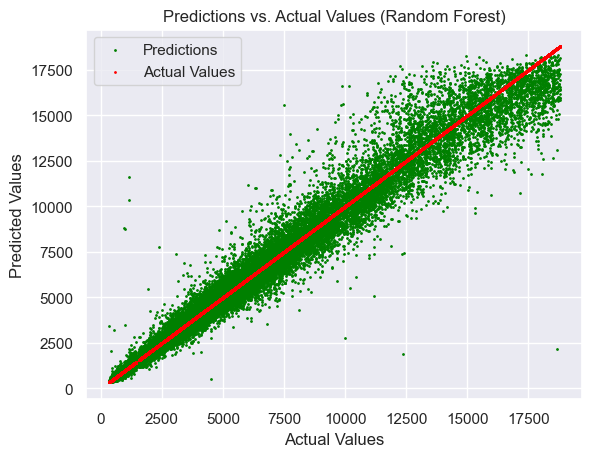

In [ ]:
plt.scatter(y_test, y_pred, color='green', label='Predictions',s=1)
plt.scatter(y_test, y_test, color='red', label='Actual Values',s=1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Actual Values (Random Forest)')
plt.legend()
plt.show()

In [ ]:
LinearRegression = LinearRegression()
pipe_linearRegression = make_pipeline(column_trans,scaler,LinearRegression)
pipe_linearRegression

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cat_pipeline__cut',
                                                   'cat_pipeline__color',
                                                   'cat_pipeline__clarity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [ ]:
pipe_linearRegression.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cat_pipeline__cut',
                                                   'cat_pipeline__color',
                                                   'cat_pipeline__clarity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred_linearRegression = pipe_linearRegression.predict(X_test)

In [ ]:
y_pred_linearRegression

array([[ 2070.35375977],
       [ 2058.1875    ],
       [  766.46777344],
       ...,
       [ 1281.63745117],
       [  547.14331055],
       [14623.20996094]])

In [ ]:
print(r2_score(y_test,y_pred_linearRegression))
print(mean_absolute_error(y_test,y_pred_linearRegression))
print(mean_squared_error(y_test,y_pred_linearRegression))

0.9447813107473182
623.7014016333912
899472.4588964928


In [ ]:
Ridge = Ridge()
pipe_ridge = make_pipeline(column_trans,scaler,Ridge)
pipe_ridge

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cat_pipeline__cut',
                                                   'cat_pipeline__color',
                                                   'cat_pipeline__clarity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('ridge', Ridge())])

In [ ]:
pipe_ridge.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cat_pipeline__cut',
                                                   'cat_pipeline__color',
                                                   'cat_pipeline__clarity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('ridge', Ridge())])

In [ ]:
y_pred_ridge = pipe_ridge.predict(X_test)

In [ ]:
y_pred_ridge

array([[ 2070.65328688],
       [ 2058.05434749],
       [  764.23922837],
       ...,
       [ 1282.49081908],
       [  548.47895626],
       [14623.12173246]])

In [ ]:
print(r2_score(y_test,y_pred_ridge))
print(mean_absolute_error(y_test,y_pred_ridge))
print(mean_squared_error(y_test,y_pred_ridge))

0.9447814525750079
623.6005536095236
899470.1486261383


In [ ]:
lasso = Lasso()
pipe_lasso = make_pipeline(column_trans,scaler,lasso)
pipe_lasso

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cat_pipeline__cut',
                                                   'cat_pipeline__color',
                                                   'cat_pipeline__clarity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('lasso', Lasso())])

In [ ]:
pipe_lasso.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cat_pipeline__cut',
                                                   'cat_pipeline__color',
                                                   'cat_pipeline__clarity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('lasso', Lasso())])

In [ ]:
y_pred_lasso = pipe_lasso.predict(X_test)

In [ ]:
y_pred_lasso

array([ 2064.00091467,  2071.27746619,   757.11392232, ...,
        1290.81076714,   538.94897412, 14575.23202642])

In [ ]:
print(r2_score(y_test,y_pred_lasso))
print(mean_absolute_error(y_test,y_pred_lasso))
print(mean_squared_error(y_test,y_pred_lasso))

0.9447797040432346
623.7709210036211
899498.6309424479


In [ ]:
# ElasticNet = ElasticNet()
# pipe_elasticnet = make_pipeline(column_trans,scaler,ElasticNet)
# pipe_elasticnet

In [ ]:
# pipe_elasticnet.fit(X_train,y_train)

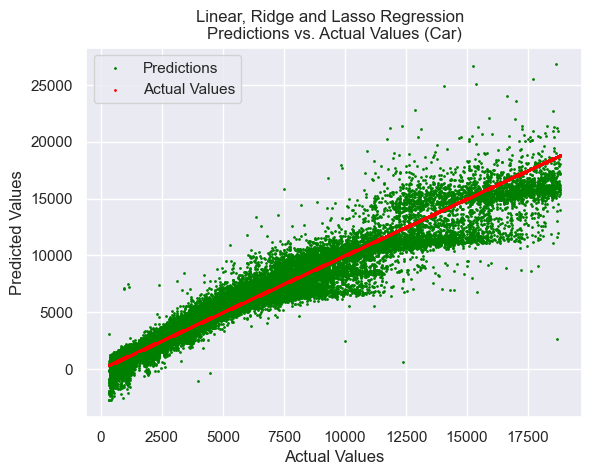

In [ ]:
plt.scatter(y_test, y_pred_linearRegression, color='green', label='Predictions',s=1)
plt.scatter(y_test, y_test, color='red', label='Actual Values',s=1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear, Ridge and Lasso Regression  \nPredictions vs. Actual Values (Car)')
plt.legend()
plt.show()

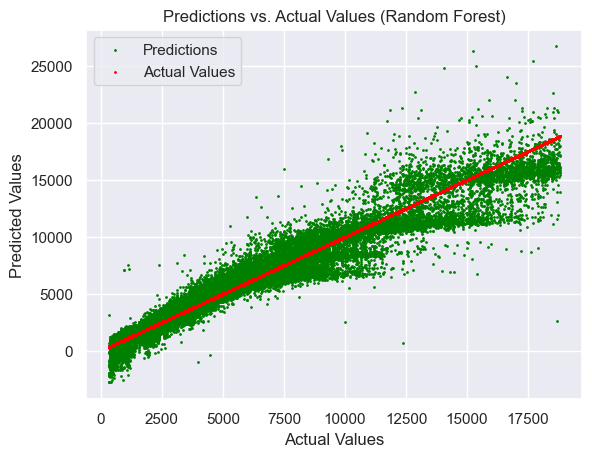

In [ ]:
plt.scatter(y_test, y_pred_lasso, color='green', label='Predictions',s=1)
plt.scatter(y_test, y_test, color='red', label='Actual Values',s=1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Actual Values (Random Forest)')
plt.legend()
plt.show()

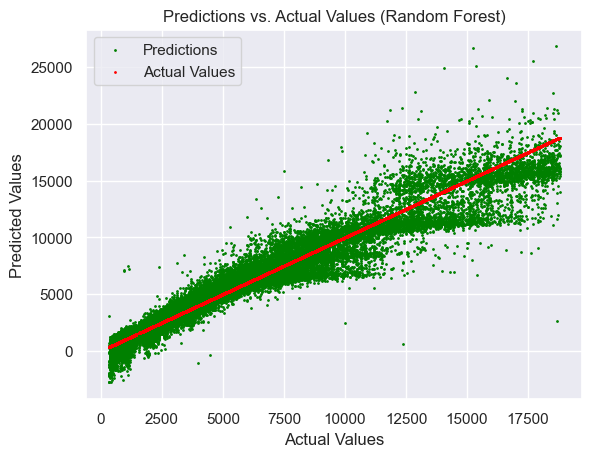

In [ ]:
plt.scatter(y_test, y_pred_ridge, color='green', label='Predictions',s=1)
plt.scatter(y_test, y_test, color='red', label='Actual Values',s=1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Actual Values (Random Forest)')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import ElasticNet
ElasticNet = ElasticNet()


In [ ]:
pipe_elastic = make_pipeline(column_trans,scaler,ElasticNet)
pipe_elastic

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cat_pipeline__cut',
                                                   'cat_pipeline__color',
                                                   'cat_pipeline__clarity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('elasticnet', ElasticNet())])

In [ ]:
pipe_elastic.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cat_pipeline__cut',
                                                   'cat_pipeline__color',
                                                   'cat_pipeline__clarity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('elasticnet', ElasticNet())])

In [ ]:
y_pred_elastic = pipe_elastic.predict(X_test)

In [ ]:
y_pred_elastic

array([ 2505.08686458,  3349.78220002,   342.66286976, ...,
        3419.37501566,   896.6306244 , 11403.64377973])

In [ ]:
print(r2_score(y_test,y_pred_elastic))
print(mean_absolute_error(y_test,y_pred_elastic))
print(mean_squared_error(y_test,y_pred_elastic))

0.859908386745601
1041.19712798714
2281990.926443276


In [ ]:
DecisionTree = DecisionTreeRegressor()
pipe_Decisiontree = make_pipeline(column_trans,scaler,DecisionTree)
pipe_Decisiontree

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cat_pipeline__cut',
                                                   'cat_pipeline__color',
                                                   'cat_pipeline__clarity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [ ]:
pipe_Decisiontree.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cat_pipeline__cut',
                                                   'cat_pipeline__color',
                                                   'cat_pipeline__clarity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [ ]:
print(r2_score(y_test,y_pred_decision_tree))
print(mean_absolute_error(y_test,y_pred_decision_tree))
print(mean_squared_error(y_test,y_pred_decision_tree))

0.9570200614910047
423.7106465537034
700112.0725086484


In [ ]:
y_pred_Decision = pipe_Decisiontree.predict(X_test)

In [ ]:
y_pred_Decision

array([ 1806.,  2260.,   764., ...,  1832.,   969., 14892.])

In [ ]:
print(r2_score(y_test,y_pred_Decision))
print(mean_absolute_error(y_test,y_pred_Decision))
print(mean_squared_error(y_test,y_pred_Decision))


0.956098683847728
425.23731459797034
715120.6470616936


In [ ]:
print(df.dtypes)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_columns].corr()

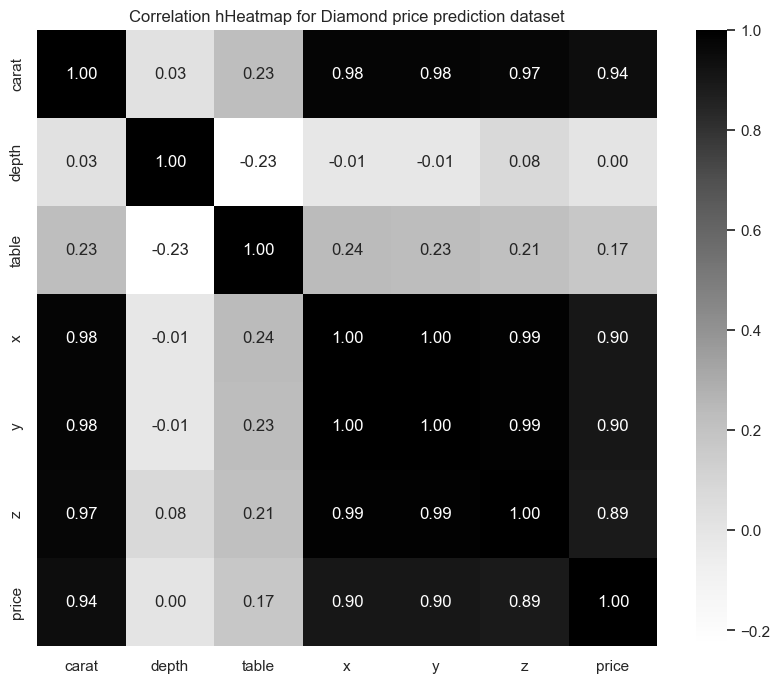

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your pandas DataFrame containing the dataset
# You may need to install seaborn if you haven't already: pip install seaborn

# Create a correlation matrix of your dataset
corr_matrix 

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Greys', fmt=".2f")
plt.title('Correlation hHeatmap for Diamond price prediction dataset')
plt.show()

In [ ]:
mae = [623.7014016333912, 
623.6005536095236,
623.7709210036211,
1041.19712798714,
325.70458733083393, 
311.7768348944769,
319.30995540019285, 
374.4079345463427,
2071.7699894504367, 
1112.855248149378,
422.23546344767414, 
367.5237016117923]
mse = [
899472.4588964928,
899470.1486261383,
899498.6309424479,
2281990.926443276,
405103.18164823955, 
374050.83597466326,
390123.87505240925,
466823.06382061326,
5299330.438106419,
5592250.745860705,
697320.3061185541,
516367.7671511227,
]



In [ ]:
def normalize_to_percentage(values):
    max_value = max(values)
    return [(value / max_value) * 100 for value in values]

# Step 3: Normalize MAE and MSE values to percentages
mae_percentage = normalize_to_percentage(mae)
mse_percentage = normalize_to_percentage(mse)

# Step 4: Print the normalized values
print("Normalized MAE (Percentage):", mae_percentage)
print("Normalized MSE (Percentage):", mse_percentage)

Normalized MAE (Percentage): [30.1047608957226, 30.09989317274267, 30.108116450180084, 50.25640555124223, 15.721078545849156, 15.04881509443911, 15.4124230501521, 18.071887152186193, 100.0, 53.71519299034624, 20.38042184208284, 17.73959964104329]
Normalized MSE (Percentage): [16.084265526939543, 16.084224214944435, 16.084733532526997, 40.80630554937776, 7.244009613626329, 6.688735054513242, 6.976151334794362, 8.347677617391321, 94.76203194266456, 100.0, 12.4694034264236, 9.233630440003605]


In [ ]:
def normalize_values(values):
    max_value = max(values)
    min_value = min(values)
    normalized_values = [(value - min_value) / (max_value - min_value) for value in values]
    return normalized_values

# Normalize MAE and MSE values
normalized_mae = normalize_values(mae)
normalized_mse = normalize_values(mse)

print("Normalized MAE:", normalized_mae)
print("Normalized MSE:", normalized_mse)

Normalized MAE: [0.1772305567958938, 0.17717325655946584, 0.1772700565917026, 0.41444496031389016, 0.007913526481795293, 0.0, 0.004280198753168743, 0.035585990485097876, 1.0, 0.45515995967439454, 0.0627608285107595, 0.0316744792859039]
Normalized MSE: [0.10069020581722099, 0.10068976308401904, 0.1006952213487083, 0.3656318507180917, 0.005950777319731783, 0.0, 0.003080188447225855, 0.01777858829635678, 0.9438656408698831, 1.0, 0.06195038053859278, 0.027273184936214417]


In [ ]:
mae = [623.7014016333912, 
623.6005536095236,
623.7709210036211,
1041.19712798714,
325.70458733083393, 
311.7768348944769,
319.30995540019285, 
374.4079345463427,
2071.7699894504367, 
1112.855248149378,
422.23546344767414, 
367.5237016117923]
mse = [
899472.4588964928,
899470.1486261383,
899498.6309424479,
2281990.926443276,
405103.18164823955, 
374050.83597466326,
390123.87505240925,
466823.06382061326,
5299330.438106419,
5592250.745860705,
697320.3061185541,
516367.7671511227,
]


from sklearn.preprocessing import Normalizer
import numpy as np

def normalize_errors(mse, mae):
    # Combine MSE and MAE into a numpy array
    errors = np.array([mse, mae]).reshape(1, -1)

    # Normalize the errors using scikit-learn's Normalizer
    normalizer = Normalizer()
    normalized_errors = normalizer.fit_transform(errors)

    # Extract normalized MSE and MAE from the normalized_errors array
    normalized_mse = normalized_errors[0][0]
    normalized_mae = normalized_errors[0][1]

    # Convert normalized values to percentage (multiply by 100)
    normalized_mse_percentage = normalized_mse * 100
    normalized_mae_percentage = normalized_mae * 100

    return {
        "Normalized MSE": normalized_mse,
        "Normalized MSE (%)": normalized_mse_percentage,
        "Normalized MAE": normalized_mae,
        "Normalized MAE (%)": normalized_mae_percentage
    }


In [ ]:
mae_value= [623.7014016333912, 
623.6005536095236,
623.7709210036211,
1041.19712798714,
325.70458733083393, 
311.7768348944769,
319.30995540019285, 
374.4079345463427,
2071.7699894504367, 
1112.855248149378,
422.23546344767414, 
367.5237016117923]
mse_value= [
899472.4588964928,
899470.1486261383,
899498.6309424479,
2281990.926443276,
405103.18164823955, 
374050.83597466326,
390123.87505240925,
466823.06382061326,
5299330.438106419,
5592250.745860705,
697320.3061185541,
516367.7671511227,
]
normalized_errors = normalize_errors(mse_value, mae_value)
print(normalized_errors)


{'Normalized MSE': 0.10874342954910704, 'Normalized MSE (%)': 10.874342954910704, 'Normalized MAE': 0.1087431502445891, 'Normalized MAE (%)': 10.874315024458909}


In [ ]:
X_train.head()

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.975439,-0.849607,-0.121531,-1.042757,-1.080970,-1.123150,0.874076,1.528722,1.352731
1,0.235195,1.833637,-0.121531,0.318447,0.279859,0.485354,-2.144558,-0.935071,-0.646786
2,0.494617,0.815855,0.399800,0.570855,0.606458,0.673737,-0.132136,0.296826,0.686225
3,-1.018676,0.260701,0.921131,-1.214034,-1.244270,-1.195605,-0.132136,0.296826,0.019720
4,-0.953821,-0.664555,-0.642862,-1.069801,-1.044681,-1.094168,0.874076,2.144670,1.352731


In [ ]:
original_column_names = {'num_pipeline__carat': 'carat', 'num_pipeline__depth': 'depth','num_pipeline__table': 'table', 'num_pipeline__x': 'x','num_pipeline__y':'y','num_pipeline__z':'z','cat_pipeline__cut':'cut','cat_pipeline__color':'color','cat_pipeline__clarity':'clarity'}

In [ ]:
X_train.rename(columns=original_column_names, inplace=True)
X_test.rename(columns=original_column_names, inplace=True)

In [ ]:
X_train.head()

,carat,depth,table,x,y,z,cut,color,clarity
0,-0.975439,-0.849607,-0.121531,-1.042757,-1.080970,-1.123150,0.874076,1.528722,1.352731
1,0.235195,1.833637,-0.121531,0.318447,0.279859,0.485354,-2.144558,-0.935071,-0.646786
2,0.494617,0.815855,0.399800,0.570855,0.606458,0.673737,-0.132136,0.296826,0.686225
3,-1.018676,0.260701,0.921131,-1.214034,-1.244270,-1.195605,-0.132136,0.296826,0.019720
4,-0.953821,-0.664555,-0.642862,-1.069801,-1.044681,-1.094168,0.874076,2.144670,1.352731


In [ ]:
X_test

,carat,depth,table,x,y,z,cut,color,clarity
0,-0.564688,-0.942132,-0.642862,-0.429765,-0.464061,-0.500036,-0.132136,-0.935071,0.019720
1,-0.175556,1.000906,-0.121531,-0.042137,-0.028595,0.036132,-1.138347,0.912774,-0.646786
2,-1.061913,0.260701,-0.121531,-1.304180,-1.298703,-1.268060,0.874076,0.912774,2.685743
3,0.970223,-0.201927,1.963794,1.048629,0.996563,0.978049,-0.132136,0.296826,0.019720
4,-0.932202,-1.312235,0.399800,-1.006699,-0.990248,-1.065186,-0.132136,-0.935071,0.686225
...,...,...,...,...,...,...,...,...,...
58067,1.013460,1.185958,-0.642862,1.003556,1.041924,1.151941,-1.138347,0.912774,0.019720
58068,-0.997058,0.260701,-1.164193,-1.141917,-1.126331,-1.108659,0.874076,-0.319122,2.019237
58069,-0.197174,-3.347799,1.442462,0.102096,0.071199,-0.224706,-0.132136,2.144670,0.019720
58070,-0.824110,-0.201927,-0.121531,-0.853450,-0.881382,-0.876803,0.874076,0.296826,-0.646786


In [ ]:
pickle.dump(pipe_randomforestregressor,open('RandomModelDiamond.pkl','wb'))

In [ ]:
pipee_random = make_pipeline(column_trans,scaler,randomforestregressor)

In [ ]:
pipee_random.fit(X_train,y_train)

ValueError: A given column is not a column of the dataframe

In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')